In [1]:
pip install bing_image_downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download("apple", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("banana", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("orange", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("peach", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("coconut", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("pear", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("berries", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("grape", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("mango", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")
downloader.download("lemon", limit=10 , output_dir="/content/drive/MyDrive/AIdataset")

[%] Downloading Images to /content/drive/MyDrive/AIdataset/apple


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://pngimg.com/uploads/apple/apple_PNG12405.png
[%] File Downloaded !

[%] Downloading Image #2 from https://pngimg.com/uploads/apple/apple_PNG12400.png
[%] File Downloaded !

[%] Downloading Image #3 from https://image.made-in-china.com/2f0j00zMpQkAEFYZrt/Fresh-Apple.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.agcanada.com/wp-content/uploads/sites/5/2018/11/apple_GettyImages186843005_cmyk.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.theprairiehomestead.com/wp-content/uploads/2014/10/150.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://minnetonkaorchards.com/wp-content/uploads/2020/08/Ambrosia-Apples.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://steemitimages.com/DQmcYcC6LMxeKJdD582pvV124b3vgJvWdu6m7Xjhn14ACND/Apple.jpg
[%] File Downloaded !

[%

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
apple = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/apple/*.jpg'):
  apple.append(img_to_array(load_img(img,target_size=(150,150))))
banana = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/banana/*.jpg'):
  banana.append(img_to_array(load_img(img,target_size=(150,150))))
orange = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/orange/*.jpg'):
  orange.append(img_to_array(load_img(img,target_size=(150,150))))
peach = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/peach/*.jpg'):
  peach.append(img_to_array(load_img(img,target_size=(150,150))))
coconut = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/coconut/*.jpg'):
  coconut.append(img_to_array(load_img(img,target_size=(150,150))))
pear = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/pear/*.jpg'):
  pear.append(img_to_array(load_img(img,target_size=(150,150))))
berries = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/berries/*.jpg'):
  berries.append(img_to_array(load_img(img,target_size=(150,150))))
grape = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/grape/*.jpg'):
  grape.append(img_to_array(load_img(img,target_size=(150,150))))
mango = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/mango/*.jpg'):
  mango.append(img_to_array(load_img(img,target_size=(150,150))))
lemon = list()
for img in glob.glob('/content/drive/MyDrive/AIdataset/lemon/*.jpg'):
  lemon.append(img_to_array(load_img(img,target_size=(150,150))))

In [4]:
input_dataset = np.array(apple + banana + orange + peach + coconut + pear + berries + grape + mango + lemon)
label_dataset = np.array([0]*len(apple) + [1]*len(banana) + [2]*len(orange) + [3]*len(peach) + [4]*len(coconut) + [5]*len(pear) + [6]*len(berries) + [7]*len(grape) + [8]*len(mango) + [9]*len(lemon))

In [5]:
print(input_dataset.shape)
print(label_dataset.shape)

(80, 150, 150, 3)
(80,)


In [6]:
print(len(lemon))

8


In [7]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.8, test_size=0.2, random_state= 0)

In [8]:
print(y_train.shape)
print(x_train.shape)

(64,)
(64, 150, 150, 3)


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [10]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train,y_train,epochs=20,batch_size = 64,validation_data=(x_test,y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 11s 11s/step - loss: 2.6094 - accuracy: 0.1406 - val_loss: 4.2619 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 9s 9s/step - loss: 4.9478 - accuracy: 0.1250 - val_loss: 2.5345 - val_accuracy: 0.0625
Epoch 3/20
1/1 [==============================] - 9s 9s/step - loss: 3.1104 - accuracy: 0.1094 - val_loss: 2.2572 - val_accuracy: 0.0625
Epoch 4/20
1/1 [==============================] - 9s 9s/step - loss: 2.5909 - accuracy: 0.1094 - val_loss: 2.2015 - val_accuracy: 0.0625
Epoch 5/20
1/1 [==============================] - 8s 8s/step - loss: 2.3564 - accuracy: 0.1406 - val_loss: 2.2336 - val_accuracy: 0.1875
Epoch 6/20
1/1 [==============================] - 8s 8s/step - loss: 2.2930 - accuracy: 0.0938 - val_loss: 2.2654 - val_accuracy: 0.1875
Epoch 7/20
1/1 [==============================] - 8s 8s/step - loss: 2.2761 - accuracy: 0.1562 - val_loss: 2.2867 - val_accuracy: 0.1250
Epoch 8/20
1/1 [==============================

In [12]:
score = Model.evaluate(x_test,y_test,verbose = 1)

1/1 [==============================] - 1s 952ms/step - loss: 2.5196 - accuracy: 0.1250


banana


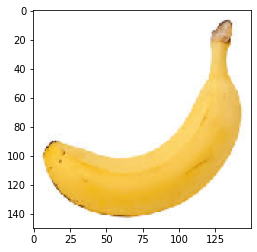

In [23]:
y_label = ['apple','lemon','orange','peach','coconut','pear','berries','banana','mango','grape']
img = load_img('/download (3).jfif',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

lemon


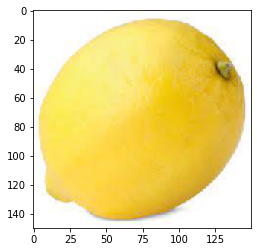

In [24]:
img = load_img('/download.jfif',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])